In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipba17-grade-ml-case-study-classification-code/sample_submission.csv
/kaggle/input/ipba17-grade-ml-case-study-classification-code/train.csv
/kaggle/input/ipba17-grade-ml-case-study-classification-code/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/ipba17-grade-ml-case-study-classification-code/train.csv')
df.head(10)

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1
5,5,27,Travel_Rarely,566,Research & Development,2,3,Other,1,3,...,80,0,6,0,3,1,0,1,0,0
6,6,34,Travel_Rarely,944,Research & Development,10,4,Medical,1,2,...,80,0,1,2,3,1,0,0,0,0
7,7,40,Travel_Rarely,1009,Research & Development,2,3,Life Sciences,1,4,...,80,1,6,3,2,3,2,1,2,0
8,8,51,Travel_Frequently,1297,Sales,6,3,Life Sciences,1,4,...,80,1,18,3,3,16,14,4,9,0
9,9,25,Travel_Rarely,806,Research & Development,9,1,Medical,1,3,...,80,1,9,2,2,9,7,7,8,0


In [3]:
df.shape

(1677, 35)

In [4]:
df.dtypes

id                           int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [5]:
df.isna().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [6]:
df.isnull().values.any()

False

In [7]:
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,...,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,...,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,...,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,...,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,...,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [8]:
df['Attrition'].value_counts()

Attrition
0    1477
1     200
Name: count, dtype: int64

<Axes: xlabel='Attrition', ylabel='count'>

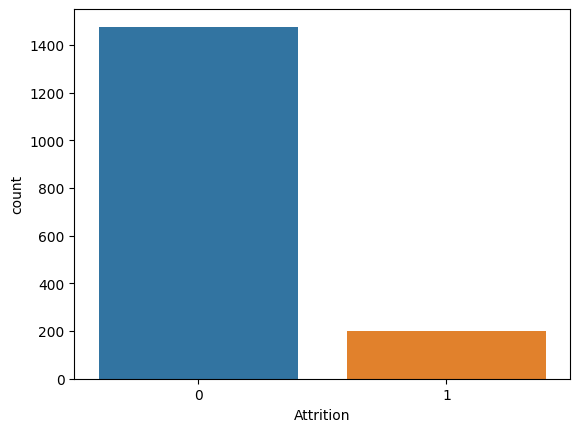

In [9]:
sns.countplot(x='Attrition', data=df)

<Axes: xlabel='Age', ylabel='count'>

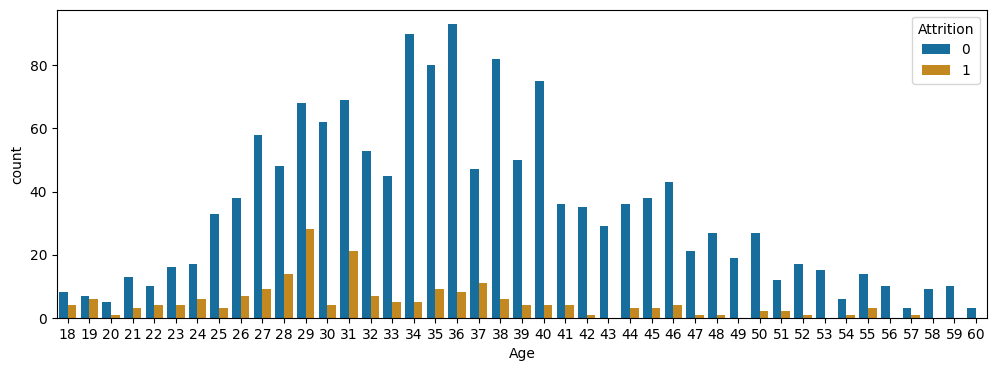

In [10]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data=df, palette='colorblind')

In [11]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column)+':'+str(df[column].unique()))
        print(df[column].value_counts())
        print('------------------------------------------------')

BusinessTravel:['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
BusinessTravel
Travel_Rarely        1290
Travel_Frequently     261
Non-Travel            126
Name: count, dtype: int64
------------------------------------------------
Department:['Research & Development' 'Sales' 'Human Resources']
Department
Research & Development    1167
Sales                      471
Human Resources             39
Name: count, dtype: int64
------------------------------------------------
EducationField:['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       775
Medical             549
Marketing           152
Technical Degree    106
Other                82
Human Resources      13
Name: count, dtype: int64
------------------------------------------------
Gender:['Male' 'Female']
Gender
Male      1064
Female     613
Name: count, dtype: int64
------------------------------------------------
JobRole:['Laboratory Technician' 'Sales Representat

In [12]:
df = df.drop('Over18', axis=1)
df = df.drop('BusinessTravel', axis=1)
df = df.drop('StandardHours', axis=1)
df = df.drop('EmployeeCount', axis=1)
#df = df.drop('JobInvolvement', axis=1)

In [13]:
df.corr

<bound method DataFrame.corr of         id  Age  DailyRate              Department  DistanceFromHome  \
0        0   36        599  Research & Development                24   
1        1   35        921                   Sales                 8   
2        2   32        718                   Sales                26   
3        3   38       1488  Research & Development                 2   
4        4   50       1017  Research & Development                 5   
...    ...  ...        ...                     ...               ...   
1672  1672   30        945                   Sales                 1   
1673  1673   32       1303  Research & Development                 2   
1674  1674   29       1184         Human Resources                24   
1675  1675   36        441                   Sales                 9   
1676  1676   36       1141  Research & Development                20   

      Education   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0             3       

In [14]:
from sklearn.preprocessing import LabelEncoder

non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

label_encoder = LabelEncoder()
df[non_numeric_columns] = df[non_numeric_columns].apply(lambda col: label_encoder.fit_transform(col))

print(df)

        id  Age  DailyRate  Department  DistanceFromHome  Education  \
0        0   36        599           1                24          3   
1        1   35        921           2                 8          3   
2        2   32        718           2                26          3   
3        3   38       1488           1                 2          3   
4        4   50       1017           1                 5          4   
...    ...  ...        ...         ...               ...        ...   
1672  1672   30        945           2                 1          3   
1673  1673   32       1303           1                 2          3   
1674  1674   29       1184           0                24          3   
1675  1675   36        441           2                 9          2   
1676  1676   36       1141           1                20          3   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0                  3                        4       1          42  ...   

<Axes: >

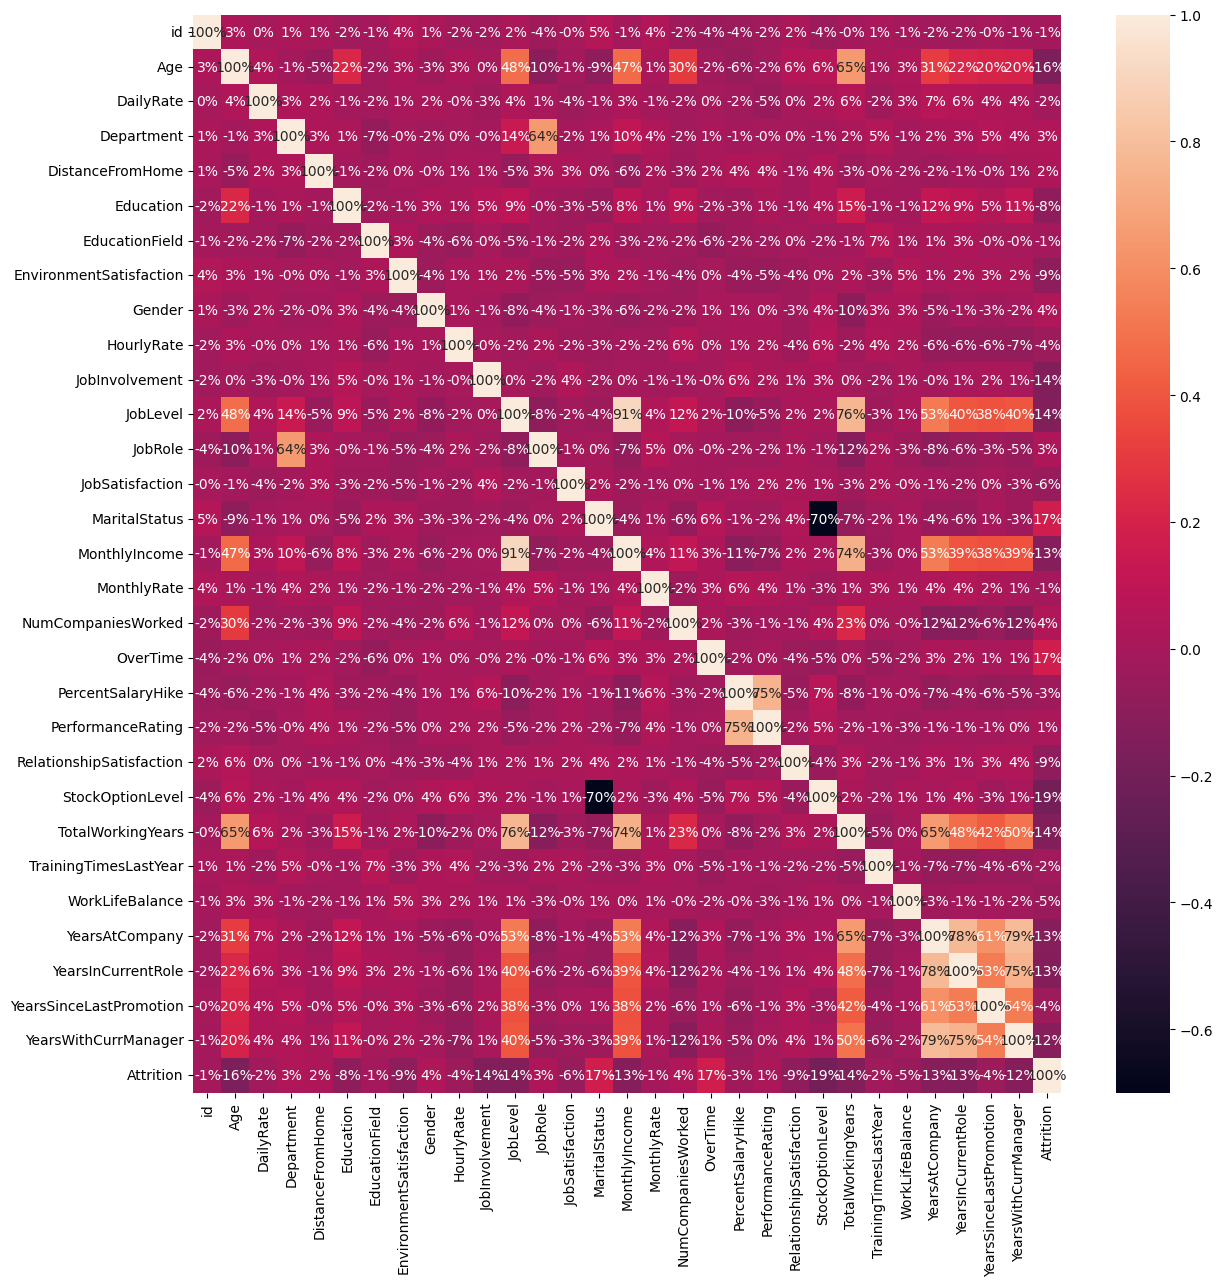

In [15]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [16]:
attrition_column = df['Attrition']
df = df.drop('Attrition', axis=1)  
df.insert(0, 'Attrition', attrition_column)  

print(df)

      Attrition    id  Age  DailyRate  Department  DistanceFromHome  \
0             0     0   36        599           1                24   
1             0     1   35        921           2                 8   
2             0     2   32        718           2                26   
3             0     3   38       1488           1                 2   
4             1     4   50       1017           1                 5   
...         ...   ...  ...        ...         ...               ...   
1672          0  1672   30        945           2                 1   
1673          0  1673   32       1303           1                 2   
1674          1  1674   29       1184           0                24   
1675          0  1675   36        441           2                 9   
1676          0  1676   36       1141           1                20   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             3               3                        4       1  ...   
1

# Random Forest

In [17]:
X = df.iloc[:, 1:df.shape[1]].values
Y = df.iloc[:,0].values


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state=0)

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0, class_weight='balanced')
forest.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=10, random_state=0)

In [20]:
forest.score(X_train, Y_train)

0.9840891010342084

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model Accuracy={}'.format((TP+TN)/(TP+TN+FN+FP)))

[[368   2]
 [ 46   4]]
Model Accuracy=0.8857142857142857


# Logistic Regression

In [22]:
train_accuracy=[]
test_accuracy=[]
models=['Logistic Regression, Decision tree']

In [23]:
def train_test_error(y_train,y_test):
    train_error = ((y_train==Y_train).sum())/len(y_train)*100
    test_error = ((y_test==Y_test).sum())/len(Y_test)*100
    train_accuracy.append(train_error)
    test_accuracy.append(test_error)
    print('{}'.format(train_error)+ "is the train accuracy")
    print('{}'.format(test_error)+ "is the test accuracy")

In [24]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 1:df.shape[1]].values
Y = df.iloc[:,0].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train,Y_train)
train_predict = log_reg.predict(X_train)
test_predict = log_reg.predict(X_test)
y_prob = log_reg.predict(X)
y_pred = np.where(y_prob> 0.8,1,0)
train_test_error(train_predict,test_predict)

62.52983293556086is the train accuracy
62.38095238095238is the test accuracy


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Trees

In [26]:
from sklearn import tree
dec = tree.DecisionTreeClassifier()
dec.fit(X_train,Y_train)
train_predict = dec.predict(X_train)
test_predict = dec.predict(X_test)
train_test_error(train_predict, test_predict)

100.0is the train accuracy
80.95238095238095is the test accuracy


In [27]:
new_data = pd.read_csv('/kaggle/input/ipba17-grade-ml-case-study-classification-code/test.csv')
print(new_data)

        id  Age     BusinessTravel  DailyRate              Department  \
0     1677   19         Non-Travel        992  Research & Development   
1     1678   45      Travel_Rarely       1136                   Sales   
2     1679   37      Travel_Rarely        155  Research & Development   
3     1680   32      Travel_Rarely        688  Research & Development   
4     1681   29  Travel_Frequently        464  Research & Development   
...    ...  ...                ...        ...                     ...   
1114  2791   31      Travel_Rarely        755                   Sales   
1115  2792   40      Travel_Rarely        654  Research & Development   
1116  2793   42  Travel_Frequently        884  Research & Development   
1117  2794   25  Travel_Frequently       1469                   Sales   
1118  2795   42      Travel_Rarely       1234  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
0                    1          1           Medical  

In [28]:
new_data = new_data.drop('Over18', axis=1)
new_data = new_data.drop('BusinessTravel', axis=1)
new_data = new_data.drop('StandardHours', axis=1)
new_data = new_data.drop('EmployeeCount', axis=1)
#new_data = new_data.drop('JobInvolvement', axis=1)


In [29]:
from sklearn.preprocessing import LabelEncoder

non_numeric_columns = new_data.select_dtypes(exclude=['float64', 'int64']).columns

label_encoder = LabelEncoder()
new_data[non_numeric_columns] = new_data[non_numeric_columns].apply(lambda col: label_encoder.fit_transform(col))

print(new_data)

        id  Age  DailyRate  Department  DistanceFromHome  Education  \
0     1677   19        992           1                 1          1   
1     1678   45       1136           2                 4          4   
2     1679   37        155           1                13          3   
3     1680   32        688           1                 1          4   
4     1681   29        464           1                 9          1   
...    ...  ...        ...         ...               ...        ...   
1114  2791   31        755           2                 1          1   
1115  2792   40        654           1                26          5   
1116  2793   42        884           1                 1          4   
1117  2794   25       1469           2                 1          2   
1118  2795   42       1234           1                 2          4   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0                  3                        4       1          43  ...   

In [30]:
X_new = new_data.iloc[:, 0:new_data.shape[1]].values
Y_new = new_data.iloc[:,0].values

In [31]:

#predictions = forest.predict(new_data.values)
ran_prob = forest.predict_proba(new_data.values)[:,1]
#dec_prob = dec.predict_proba(new_data.values)[:,1]
#log_pred = log_reg.predict(new_data.values)
#log_prob = log_reg.predict_proba(new_data.values)[:,1]
# Add the 'Id' and 'Attrition' columns to the result DataFrame
result_df = pd.DataFrame({'Id': new_data['id'], 'Attrition': ran_prob})

print(result_df)

        Id  Attrition
0     1677        0.1
1     1678        0.1
2     1679        0.0
3     1680        0.0
4     1681        0.3
...    ...        ...
1114  2791        0.0
1115  2792        0.0
1116  2793        0.0
1117  2794        0.0
1118  2795        0.0

[1119 rows x 2 columns]


In [32]:
result_df = pd.DataFrame({'Id':new_data['id'], 'Attrition': ran_prob})
result_df.to_csv('submission.csv',index=False)